In [50]:
import pandas as pd
data1=pd.read_csv("dashrevised111.csv")
data1.head()



,npastblocks,numsims,alpha,gamma,timewarp,numblocks,blocktime,winratio,adjustedwinning,selfishsecondsperblock,adjustedrelativegain,gainstddev,adjustedgainsteddev,secondsperblockstddev,finalheight,numreorgs,smwinreorgs,didbetternaive,didbettertimeadjust,relativegain
0,24,30,0.06,0.00,0,10000,150,0.013402,0.012750,11896.763150,-0.787508,0,0,0,11000.03333,536.3,0.059112,0.0,0.0,-0.776634
1,24,30,0.06,0.00,3600,10000,150,0.024531,0.023482,6435.077768,-0.608640,0,0,0,11000.03333,505.4,0.108957,0.0,0.0,-0.591154
2,24,30,0.06,0.00,7200,10000,150,0.034366,0.034033,4447.266823,-0.432776,0,0,0,11000.03333,472.3,0.156436,0.0,0.0,-0.427226
3,24,30,0.06,0.05,0,10000,150,0.015778,0.015008,10148.103380,-0.749869,0,0,0,11000.00000,531.1,0.059508,0.0,0.0,-0.737026
4,24,30,0.06,0.05,3600,10000,150,0.027010,0.025877,5825.057423,-0.568709,0,0,0,11000.06667,503.7,0.109000,0.0,0.0,-0.549826


In [60]:
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(data1.drop('relativegain',axis='columns'))
scaled_y = sy.fit_transform(data1['relativegain'].values.reshape(d3.shape[0],1))

scaled_X

array([[0.        , 0.        , 0.        , ..., 0.00712909, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.08143568, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.15221546, 0.        ,
        0.        ],
       ...,
       [0.06024096, 0.        , 1.        , ..., 0.63156367, 1.        ,
        1.        ],
       [0.06024096, 0.        , 1.        , ..., 0.699892  , 1.        ,
        1.        ],
       [0.06024096, 0.        , 1.        , ..., 0.78119513, 1.        ,
        1.        ]])

In [61]:
scaled_y

array([[0.00315664],
       [0.11179197],
       [0.20780369],
       ...,
       [0.9628732 ],
       [0.94094515],
       [0.96158514]])

In [62]:
scaled_y.reshape(7524,)

array([0.00315664, 0.11179197, 0.20780369, ..., 0.9628732 , 0.94094515,
       0.96158514])

In [54]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):

    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 2 (area, bedroom)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0] # number of rows in X
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):        
        y_predicted = np.dot(w, X.T) + b

        w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.mean(np.square(y_true-y_predicted)) # MSE (Mean Squared Error)
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),500)


In [63]:
w, b, cost

(array([ 0.01894399,  1.        ,  0.14968947,  0.38459264,  0.1778896 ,
         1.        ,  1.        ,  0.29424759,  0.28740062,  1.05037929,
         0.46410234,  1.        ,  1.        ,  1.        ,  0.15286377,
         0.46153505,  0.35869449, -0.02869325, -0.01046175]),
 -0.7013018144130029,
 0.030703602187131265)

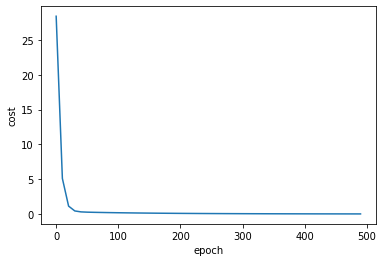

In [64]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [68]:
def predict(npastblocks,numsims,alpha,gamma,timewarp,numblocks,blocktime,winratio,adjustedwinning,selfishsecondsperblock,adjustedrelativegain,gainstddev,adjustedgainsteddev,secondsperblockstddev,finalheight,numreorgs,smwinreorgs,didbetternaive,didbettertimeadjust,w,b):
    scaled_X = sx.transform([[npastblocks,numsims,alpha,gamma,timewarp,numblocks,blocktime,winratio,adjustedwinning,selfishsecondsperblock,adjustedrelativegain,gainstddev,adjustedgainsteddev,secondsperblockstddev,finalheight,numreorgs,smwinreorgs,didbetternaive,didbettertimeadjust]])[0]
    # here w1 = w[0] , w2 = w[1], w3 = w[2] and bias is b
    # equation for price is w1*area + w2*bedrooms + w3*age + bias
    # scaled_X[0] is area
    # scaled_X[1] is bedrooms
    # scaled_X[2] is age
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    # once we get price prediction we need to to rescal it back to original value
    # also since it returns 2D array, to get single value we need to do value[0][0]
    return sy.inverse_transform([[scaled_price]])[0][0]

In [69]:
predict(24,30,0.06,0,0,10000,150,0.013401937,0.01274954,11896.76315,-0.787507666,0,0,0,11000.03333,536.3,0.05911187,0,0,w,b)

-1.9794067748275297

In [70]:
import random
random.randint(0,6) # randit gives random number between two numbers specified in the argument

6

In [72]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
 
    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):    
        random_index = random.randint(0,total_samples-1) # random index from total samples
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        
        y_predicted = np.dot(w, sample_x.T) + b
    
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.square(sample_y-y_predicted)
        
        if i%100==0: # at every 100th iteration record the cost and epoch value
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd =stochastic_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),10000)
w_sgd, b_sgd, cost_sgd

(array([0.97200213, 1.        , 0.925644  , 0.93262439, 0.9300434 ,
        1.        , 1.        , 0.93923239, 0.93994549, 0.99557363,
        0.93904833, 1.        , 1.        , 1.        , 0.97687799,
        0.92407254, 0.93660731, 0.89156671, 0.89230224]),
 -0.12553496536683306,
 27.81069185041651)

In [73]:
w , b

(array([ 0.01894399,  1.        ,  0.14968947,  0.38459264,  0.1778896 ,
         1.        ,  1.        ,  0.29424759,  0.28740062,  1.05037929,
         0.46410234,  1.        ,  1.        ,  1.        ,  0.15286377,
         0.46153505,  0.35869449, -0.02869325, -0.01046175]),
 -0.7013018144130029)

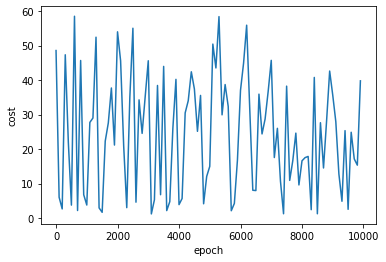

In [74]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)

In [75]:
predict(24,30,0.06,0,0,10000,150,0.013401937,0.01274954,11896.76315,-0.787507666,0,0,0,11000.03333,536.3,0.05911187,0,0,w_sgd, b_sgd)

-0.9963587774532023